In [1]:
from plot_publication import *
import numpy as np
import os

path_figure_dir = "figures"

In [2]:
rc = matplotlib.rcParams
rc["xtick.minor.width"] = 0.4
rc["ytick.minor.width"] = 0.4
# plt.rc("xtick.minor", width=6)

# Create a single figure

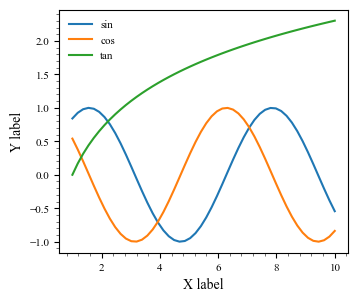

In [3]:
Fig = FigurePublication(1, 1)
fig = Fig.fig
ax:plt.Axes = Fig.ax

# * plot data
x = np.linspace(1, 10, 50)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.log(x)
ax.plot(x, y1, label='sin')
ax.plot(x, y2, label='cos')
ax.plot(x, y3, label='tan')

# * beautify the figure
enable_axes_legend(ax)
ax.set_xlabel("X label")
ax.set_ylabel('Y label')
# ticks_align_limits_x(ax)
# ticks_align_limits_y(ax)
enable_minor_locator(ax)
# fig.tight_layout() # not necessary

# * save
Fig.save(os.path.join("figures", "1x1.png")) # use .png or .svg

# Create sub-figures with identical size
## Create two figures

C:\Users\ruozh\AppData\Local\Temp\ipykernel_18588\1738103306.py:21: UserWarning: The figure layout has changed to tight
  fig.tight_layout(w_pad=2)


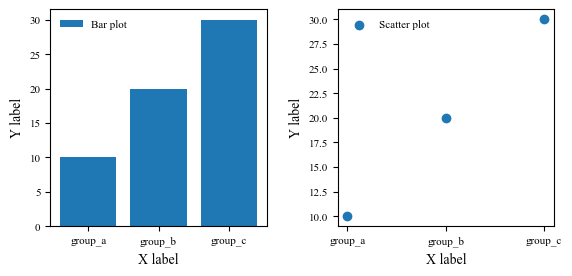

In [4]:
Fig = FigurePublication(1, 2)
fig, axes = Fig.fig, Fig.ax

names = ['group_a', 'group_b', 'group_c']
values = np.array([10, 20, 30])

ax = axes[0]
ax.cla()  # clear the current Axes state without closing it.
ax.bar(names, values, label='Bar plot')
enable_axes_legend(ax)
ax.set_xlabel("X label")
ax.set_ylabel("Y label")

ax = axes[1]
ax.cla()  # clear the current Axes state without closing it.
ax.scatter(names, values, label="Scatter plot")
enable_axes_legend(ax)
ax.set_xlabel('X label')
ax.set_ylabel('Y label')

fig.tight_layout(w_pad=2)
Fig.save(os.path.join("figures", "1x2.png"))

## Create 3 x 2 figures

C:\Users\ruozh\AppData\Local\Temp\ipykernel_18588\4111650892.py:18: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


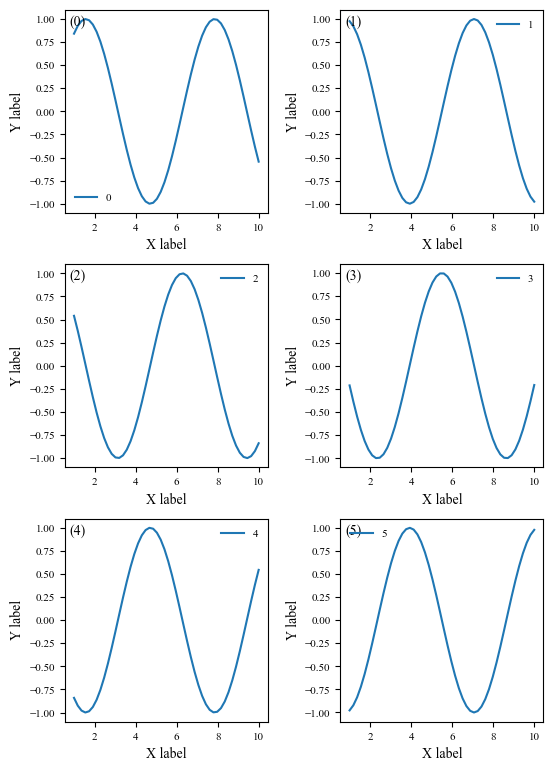

In [5]:
Fig = FigurePublication(3, 2)
fig, axes = Fig.fig, Fig.ax

x = np.linspace(1, 10, 50)

for i, ax in enumerate(Fig.ax.flatten()):
    ax.cla()  # clear the current Axes state without closing it.
    y = np.sin(x + np.pi / 4 * i)
    ax.plot(x, y, label=i)
    ax.set_xlabel("X label")
    ax.set_ylabel("Y label")
    enable_axes_legend(ax)
    Fig.corner_annotate(ax, "(%d)" % i)  # add figure index

# ! use this to select the best figure size
Fig.stretch_figure_height(0.8)  

fig.tight_layout()
# fig.tight_layout(w_pad=6)
Fig.save(os.path.join("figures", "3x2.png"))

## Create 4 x 4 figures

* add a **legend** for all sub-figures

C:\Users\ruozh\AppData\Local\Temp\ipykernel_18588\3832722159.py:19: UserWarning: The figure layout has changed to tight
  fig.tight_layout(w_pad=2)


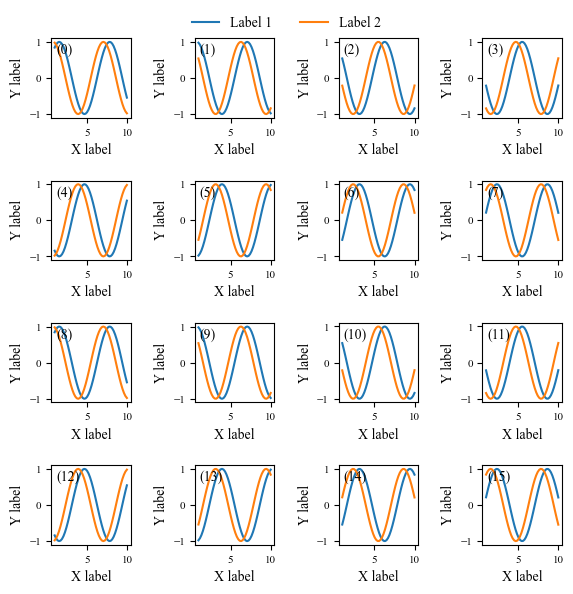

In [6]:
Fig = FigurePublication(4, 4)
fig, axes = Fig.fig, Fig.ax

x = np.linspace(1, 10, 50)

for i, ax in enumerate(Fig.ax.flatten()):
    y1 = np.sin(x + np.pi/4 *i)
    y2 = np.sin(x + np.pi/4 *(i+1))
    line1, = ax.plot(x, y1)
    line2, = ax.plot(x, y2)
    ax.set_xlabel("X label")
    ax.set_ylabel("Y label")
    Fig.corner_annotate(ax, "(%d)" % i)  # add figure index

# * add a legend for all plot
enable_figure_legend(fig, [line1, line2], ["Label 1", "Label 2"]) 

Fig.stretch_figure_height(0.6)  # * use this to select the best figure size
fig.tight_layout(w_pad=2)
Fig.save("figures/4x4.png")

## Share common x or y axis

C:\Users\ruozh\AppData\Local\Temp\ipykernel_18588\2680512880.py:28: UserWarning: The figure layout has changed to tight
  fig.tight_layout(w_pad=1, h_pad=1)  # make sub-figures closer


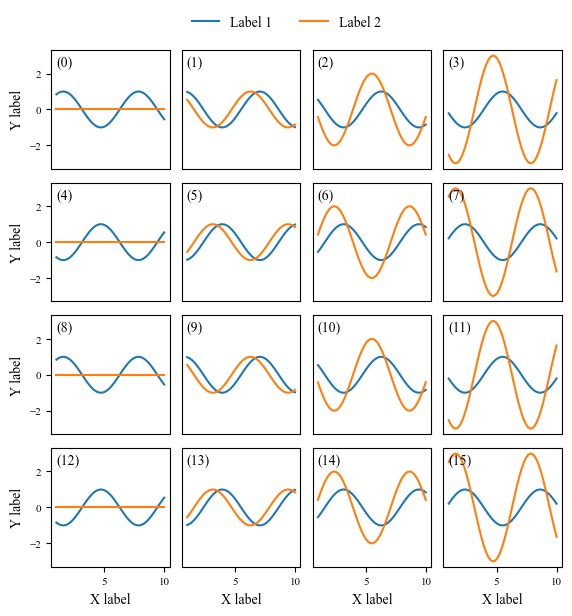

In [7]:
Fig = FigurePublication(4, 4)
fig, axes = Fig.fig, Fig.ax

# * set equal x or y limits by sharing
# * for y limit
for ax_in_row in axes:
    set_equal_ylim(ax_in_row)
# * for x limit
for ax_in_col in axes.T:
    set_equal_xlim(ax_in_col)

# * plot sub-figures
x = np.linspace(1, 10, 50)
for i, ax in enumerate(Fig.ax.flatten()):
    y1 = np.sin(x + np.pi / 4 * i)
    amplitude = i % 4
    y2 = amplitude * np.sin(x + np.pi / 4 * (i + 1))
    (line1,) = ax.plot(x, y1)
    (line2,) = ax.plot(x, y2)
    ax.set_xlabel("X label")
    ax.set_ylabel("Y label")
    Fig.corner_annotate(ax, "(%d)" % i)  # add figure index

# * add a legend for all plot
enable_figure_legend(fig, [line1, line2], ["Label 1", "Label 2"])

# * make sub-figures closer (manually)
fig.tight_layout(w_pad=1, h_pad=1)  # make sub-figures closer

Fig.stretch_figure_height(0.6)  # * use this to select the best figure size

# * save
Fig.save(os.path.join("figures", "share_axis.png"))

# Create sub-figures with non-uniform size


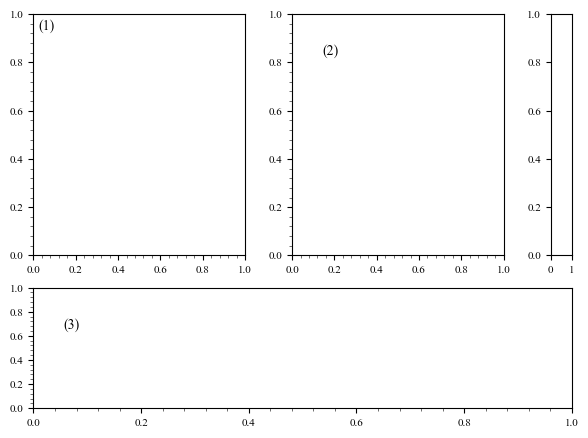

In [10]:
# create a base and clear all

row_count = 2
col_count = 3

Fig = FigurePublication(row_count, col_count)
fig = Fig.fig
fig.clear()


w_ratios = [1, 1, 0.1]
h_ratios = [1, 0.5]

# * specify grids for creating axes with different size
gs = fig.add_gridspec(nrows=row_count, ncols=col_count, width_ratios=w_ratios, height_ratios=h_ratios)

# * create each axes
axes = np.array([fig.add_subplot(gs[0, i]) for i in range(col_count)])
ax_long = fig.add_subplot(gs[1, :])  # merge two grid into a large axes

# Note: in this situation, do not use set_box_aspect(1), because
# This could make box of each row not aligned
Fig.stretch_figure_height(0.8)

# * enable minor locater
enable_minor_locator(axes[0])
enable_minor_locator(axes[1])
enable_minor_locator(ax_long)

# * add sub-figure index
Fig.corner_annotate(axes[0], "(1)")
Fig.corner_annotate(axes[1], "(2)", pad=0.3)  # add figure index
Fig.corner_annotate(ax_long, "(3)", pad=0.3)  # add figure index
Fig.save("figures/grid_spec.png")

# Change page size

In [11]:
Fig.change_page(PageSlide(aspectRatio='4:3'))
Fig.save("figures/grid_spec-slide.png")